<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [2]:
xls = pd.ExcelFile('bank_term_deposit_marketing_analysis.xlsx')

In [3]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [5]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58.0,management,married,tertiary
1,2837,44.0,technician,single,secondary
2,2838,33.0,entrepreneur,married,secondary
3,2839,47.0,blue-collar,married,unknown
4,2840,33.0,unknown,single,unknown


In [6]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143.0,yes,no
1,2837,no,29.0,yes,no
2,2838,no,2.0,yes,yes
3,2839,no,1506.0,yes,no
4,2840,no,1.0,no,no


In [7]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown
1,2837,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown
2,2838,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown
3,2839,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown
4,2840,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown


In [8]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [9]:
df = pd.merge(client_info, loan_history, on = ['ID'])
df = pd.merge(df, marketing_history, on = ['ID'])
df = pd.merge(df, subscription_history, on = ['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,2837,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,2838,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,2839,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,2840,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [10]:
df.columns

Index(['ID', 'AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'BALANCE',
       'HOUSING', 'LOAN', 'CONTACT', 'DAY', 'MONTH', 'DURATION', 'CAMPAIGN',
       'PDAYS', 'PREVIOUS', 'POUTCOME', 'TERM_DEPOSIT'],
      dtype='object')

In [11]:
df = df.drop(['ID'], axis = 1)

In [12]:
df.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


### Task 4: Data Prep & Start H2O

In [13]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21, mixed mode)
  Starting server from C:\Users\hancu\Anaconda3\envs\CiprianEnv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\hancu\AppData\Local\Temp\tmpf_fnz0g7
  JVM stdout: C:\Users\hancu\AppData\Local\Temp\tmpf_fnz0g7\h2o_hancu_started_from_python.out
  JVM stderr: C:\Users\hancu\AppData\Local\Temp\tmpf_fnz0g7\h2o_hancu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Athens
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_hancu_mbjd0l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.945 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [14]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
h2o_df.describe()

Rows:45211
Cols:17

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.936210214328135,,,,,1362.2720576850795,,,,15.806418791886914,,258.1630797814694,2.7638406582468926,40.197827962221645,0.5803233726305548,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975401,,,,,3044.7658291685257,,,,8.32247615304459,,257.52781226517124,3.098020883279173,100.12874599059833,2.303441044931221,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [16]:
train, test = h2o_df.split_frame(ratios = [.75])

x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Task 5: Run H2O AutoML

In [17]:
from h2o.automl import H2OAutoML

In [18]:
df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [19]:
aml = H2OAutoML(max_runtime_secs = 600, 
                balance_classes = True,
               stopping_metric = 'logloss',
               seed=1)
%time aml.train(x=x, y=y, training_frame = train)

AutoML progress: |
10:16:38.802: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Wall time: 10min 2s


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_1_20230114_101638

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03495973292368849
RMSE: 0.18697522007926207
LogLoss: 0.12256342109078959
AUC: 0.9841336051134105
AUCPR: 0.9008986045610351
Gini: 0.968267210226821
Null degrees of freedom: 10063
Residual degrees of freedom: 10049
Null deviance: 7136.485835547566
Residual deviance: 2466.956539715413
AIC: 2496.956539715413

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5038284715897969
       no    yes    Error    Rate
-----  ----  -----  -------  ---------------
no     8731  187    0.021    (187.0/8918.0)
yes    240   906    0.2094   (240.0/1146.0)
Total  8971  1093   0.0424   (427.0/10064.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.503828     0.80929   150
max f2                       0.272236     0.858993  229
max f0point5                 0.578901     0.84617   123
max accuracy                 0.512644     0.957671  146
max precision                0.977997     1         0
max recall                   0.0305436    1         354
max specificity              0.977997     1         0
max absolute_mcc             0.503828     0.785714  150
max min_per_class_accuracy   0.297421     0.932945  221
max mean_per_class_accuracy  0.2496       0.93935   237
max tns                      0.977997     8918      0
max fns                      0.977997     1144      0
max fps                      0.000707135  8918      399
max tps                      0.0305436    1146      354
max tnr                      0.977997     1         0
max fnr                      0.977997     0.998255  0
max fpr                      0.000707135  1         399
max tpr                      0.0305436    1         354

Gains/Lift Table: Avg response rate: 11.39 %, avg score: 12.70 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100358                   0.893411           8.78185   8.78185            1                0.929949    1                           0.929949            0.0881326       0.0881326                  778.185   778.185            0.0881326
2        0.0200715                   0.833625           8.78185   8.78185            1                0.86423     1                           0.89709             0.0881326       0.176265                   778.185   778.185            0.176265
3        0.0300079                   0.787754           8.51839   8.69461            0.97             0.808426    0.990066                    0.867731            0.0846422       0.260908                   751.839   769.461            0.260571
4        0.0400437                   0.750623           8.521     8.6511             0.970297         0.767341    0.985112                    0.842571            0.0855148       0.346422                   752.1     765.11             0.34575
5        0.0500795                   0.717573           8.43405   8.60761            0.960396         0.734632    0.980159                    0.820941            0.0846422       0.431065                   743.405   760.761            0.429943
6        0.10006                     0.534895           6.37252   7.49117            0.725646         0.625851    0.853029                    0.723493            0.318499        0.749564             

### Task 6: AutoML Leaderboard and Ensemble Exploration

In [20]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_3_AutoML_1_20230114_101638,0.934625,0.195132,0.622326,0.171973,0.248089,0.061548
StackedEnsemble_AllModels_2_AutoML_1_20230114_101638,0.933973,0.195772,0.619254,0.162548,0.24857,0.061787
StackedEnsemble_BestOfFamily_4_AutoML_1_20230114_101638,0.933675,0.196338,0.616654,0.159825,0.248984,0.0619929
StackedEnsemble_AllModels_1_AutoML_1_20230114_101638,0.933649,0.196202,0.619759,0.163995,0.2487,0.0618519
StackedEnsemble_BestOfFamily_1_AutoML_1_20230114_101638,0.933588,0.197821,0.612042,0.171367,0.249687,0.0623434
StackedEnsemble_BestOfFamily_3_AutoML_1_20230114_101638,0.933444,0.196437,0.617353,0.169388,0.24894,0.0619711
GBM_1_AutoML_1_20230114_101638,0.933428,0.206036,0.612736,0.171118,0.255567,0.0653143
StackedEnsemble_BestOfFamily_2_AutoML_1_20230114_101638,0.93303,0.197011,0.616215,0.161734,0.249058,0.0620301
GBM_grid_1_AutoML_1_20230114_101638_model_3,0.932682,0.200851,0.618162,0.181263,0.251629,0.0633173
GBM_grid_1_AutoML_1_20230114_101638_model_6,0.93251,0.200499,0.614464,0.173472,0.251514,0.0632594


In [21]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

C:\Users\hancu\Anaconda3\envs\CiprianEnv\lib\site-packages\h2o\estimators\stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [22]:
metalearner.varimp()

[('GBM_1_AutoML_1_20230114_101638',
  0.7563604712486267,
  1.0,
  0.28639948862800324),
 ('GBM_grid_1_AutoML_1_20230114_101638_model_3',
  0.42593449354171753,
  0.5631369032791597,
  0.16128212112670864),
 ('DRF_1_AutoML_1_20230114_101638',
  0.42581796646118164,
  0.5629828403885601,
  0.16123799759362437),
 ('GBM_grid_1_AutoML_1_20230114_101638_model_2',
  0.2790932357311249,
  0.36899500481613995,
  0.10567998068563007),
 ('GBM_grid_1_AutoML_1_20230114_101638_model_6',
  0.13385584950447083,
  0.17697361852278826,
  0.050685153845573885),
 ('DeepLearning_grid_1_AutoML_1_20230114_101638_model_2',
  0.1312970221042633,
  0.17359053929340532,
  0.04971624168429059),
 ('DeepLearning_grid_1_AutoML_1_20230114_101638_model_1',
  0.11964625865221024,
  0.1581868212318049,
  0.04530462470847829),
 ('GBM_grid_1_AutoML_1_20230114_101638_model_4',
  0.09675818681716919,
  0.12792602270374778,
  0.036637947484567696),
 ('GBM_5_AutoML_1_20230114_101638',
  0.09555178135633469,
  0.1263310088093

### Task 7: Base Learner XGBoost Model Exploration

In [23]:
model = h2o.get_model('GBM_1_AutoML_1_20230114_101638')

In [24]:
model.model_performance(test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.06621109609176443
RMSE: 0.2573151687945435
LogLoss: 0.20818549561008748
Mean Per-Class Error: 0.15985507727735707
AUC: 0.9366947483212482
AUCPR: 0.6287497977408965
Gini: 0.8733894966424964

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18164798363954085
       no    yes    Error    Rate
-----  ----  -----  -------  ----------------
no     9197  839    0.0836   (839.0/10036.0)
yes    323   1045   0.2361   (323.0/1368.0)
Total  9520  1884   0.1019   (1162.0/11404.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.181648     0.642681  250
max f2                       0.0734954    0.749908  311
max f0point5                 0.306479     0.61791   190
max accuracy                 0.306479     0.908365  190
max precision                0.876553     1         0
max recall                   0.00226691   1         395
max specificity              0.876553     1         0
max absolute_mcc             0.178992     0.595238  251
max min_per_class_accuracy   0.0912595    0.867178  299
max mean_per_class_accuracy  0.0581614    0.876711  323
max tns                      0.876553     10036     0
max fns                      0.876553     1367      0
max fps                      0.00123075   10036     399
max tps                      0.00226691   1368      395
max tnr                      0.876553     1         0
max fnr                      0.876553     0.999269  0
max fpr                      0.00123075   1         399
max tpr                      0.00226691   1         395

Gains/Lift Table: Avg response rate: 12.00 %, avg score:  8.65 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100842                   0.725703           6.66901     6.66901            0.8              0.774362    0.8                         0.774362            0.0672515       0.0672515                  566.901   566.901            0.0649597
2        0.0200807                   0.655476           6.21563     6.44331            0.745614         0.686369    0.772926                    0.730558            0.0621345       0.129386                   521.563   544.331            0.124205
3        0.0300772                   0.595364           5.41125     6.10029            0.649123         0.622579    0.731778                    0.69467             0.0540936       0.18348                    441.125   510.029            0.174313
4        0.0400737                   0.55003            5.99626     6.07434            0.719298         0.57121     0.728665                    0.663872            0.0599415       0.243421                   499.626   507.434            0.231066
5        0.0500702                   0.510902           5.33813     5.92736            0.640351         0.530372    0.711033                    0.637219            0.0533626       0.296784                   433.813   492.736            0.280343
6        0.100053                    0.350544           4.53375     5.23117            0.54386          0.42838     0.62752                     0.532891            0.226608        0.523392                   353.375   423.117            0.481044
7        0.150035                    0.213922           3.861       4.77471            0.463158         0.282154    0.572764                    0.449361            0.192982        0.716374                   286.1     377.471           

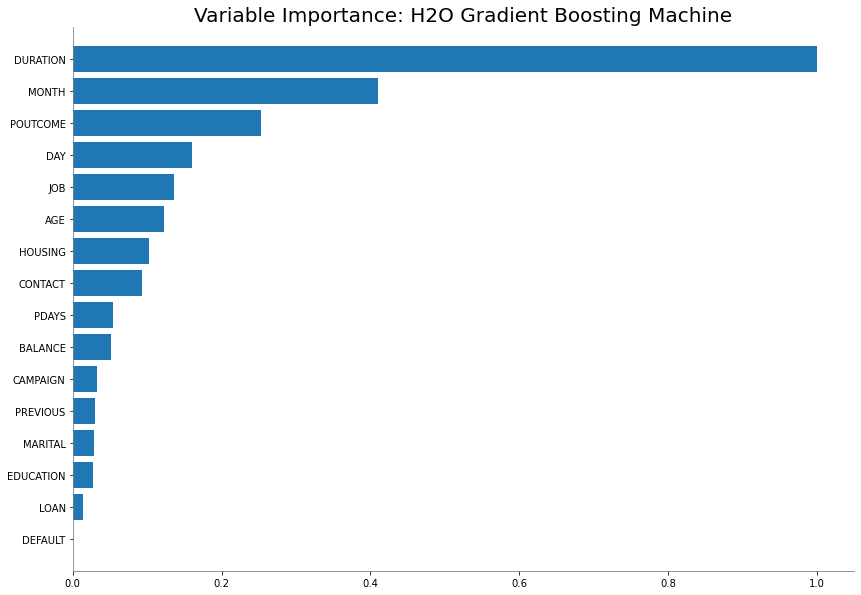

<Figure size 432x288 with 0 Axes>

In [28]:
model.varimp_plot(num_of_features=20)

In [27]:
model.varimp_plot?